# 3. Analyse exploratoire des données synthétiques téléphonie

Ce notebook permet d’explorer et de comprendre les données générées pour le projet téléphonie. On va analyser la structure, les statistiques, la répartition des appels, des agents, des sujets, et vérifier l’anonymisation des données.

## Objectif de l’analyse

L’objectif de ce notebook est de :
- Charger les données synthétiques générées (appels téléphoniques et dialogues).
- Explorer la structure et le contenu des fichiers.
- Calculer des statistiques descriptives (nombre d’appels, durée, répartition par agent et sujet, taux de résolution…).
- Visualiser les principales tendances.
- Vérifier que les données personnelles sont bien anonymisées.

### Étape 1 : Import des librairies
Dans cette étape, on importe toutes les librairies nécessaires pour le projet. On utilise des librairies standards de Python et des librairies spécialisées pour la data science (pandas, matplotlib).

In [8]:
# ----- Import libraries PEP 8 -----
# ----- Standard library -----
import pandas as pd # Librairie qui sert à manipuler et analyser les métadonnées (tableau de donnéez, CSV, Excel, SQL, etc.)
import matplotlib.pyplot as plt # On importe la librairie matplotlib pour personnaliser le graphique

# ----- Third party libraries -----


### Étape 2 : Chargement des données

Dans cette étape, nous allons charger le fichier CSV des appels téléphoniques généré précédemment.  
On utilise la librairie pandas pour lire le fichier et obtenir un tableau de données facile à explorer.  
Cela nous permettra de visualiser la structure des données et de commencer l’analyse.

In [3]:
cdr_df = pd.read_csv("../data/raw/cdr_synthetic.csv") # read_csv() sert à lire un fichier CSV et le convertir en un DataFrame pandas.

print("Fichier CSV chargé avec succès.")

Fichier CSV chargé avec succès.


### Étape 3 : Aperçu et structure des données

Dans cette étape, on affiche les premières lignes du tableau de données pour vérifier que le chargement s’est bien déroulé et comprendre la structure du fichier.  
On utilise la méthode `.head()` de pandas pour visualiser rapidement les colonnes et les premiers exemples d’appels téléphoniques.

In [4]:
cdr_df.head() # head() affiche les premières lignes du DataFrame pour un aperçu rapide des données.

,call_id,caller_id,agent_id,start_ts,duration_sec,topic,resolved
0,CALL_0001,b2b79fe6a94f1d82fa5972eaa6647146fd97d3cec89b53...,D,2025-08-16T07:42:51.470748,1324,orders,1
1,CALL_0002,9a414725d4d31b8e443e0f5f4ea3d9eb1c74f6291422f8...,B,2025-08-27T10:12:51.470748,1268,orders,1
2,CALL_0003,aab3e738cb3d19170392f1516db9aae2398b40af97a0f9...,D,2025-08-26T20:25:51.470748,160,other,1
3,CALL_0004,34f186ba3c2f4059776724f32f746e17a124f51cbba67f...,D,2025-08-17T09:55:51.470748,1245,returns,0
4,CALL_0005,ea24093ef6253cec250cd830d4a8ae0692f362c539bf23...,B,2025-09-04T15:35:51.470748,282,returns,1


### Étape 4 : Statistiques descriptives sur les appels

Dans cette étape, on va calculer des statistiques simples pour mieux comprendre le jeu de données :
- Nombre total d’appels
- Durée moyenne, minimale et maximale des appels
- Répartition des appels par agent et par sujet
- Taux de résolution des appels

Ces statistiques permettent d’avoir une vue d’ensemble et de détecter d’éventuelles anomalies ou tendances.

In [6]:
# Nombre total d'appels
print("Nombre total d'appels :", len(cdr_df)) # len() donne le nombre de lignes (appels) dans le DataFrame

# Statistiques sur la durée des appels
print("\nDurée moyenne :", cdr_df['duration_sec'].mean()) # .mean() calcule la moyenne
print("Durée minimale :", cdr_df['duration_sec'].min()) # .min() calcule la valeur la plus basse
print("Durée maximale :", cdr_df['duration_sec'].max()) # .max() calcule la valeur la plus haute

# Répartition des appels par agent
print("\nAppels par agent :")
print(cdr_df['agent_id'].value_counts()) # .value_counts() compte le nombre d'appels par agent

# Répartition des appels par sujet
print("\nAppels par sujet :")
print(cdr_df['topic'].value_counts()) # .value_counts() compte le nombre d'appels par sujet

# Taux de résolution
print("\nTaux de résolution :", cdr_df['resolved'].mean()) # .mean() donne le pourcentage d'appels résolus

Nombre total d'appels : 200

Durée moyenne : 851.565
Durée minimale : 31
Durée maximale : 1798

Appels par agent :
agent_id
B    47
E    42
A    39
C    39
D    33
Name: count, dtype: int64

Appels par sujet :
topic
tech_support    42
billing         42
returns         41
other           38
orders          37
Name: count, dtype: int64

Taux de résolution : 0.815


### Étape 5 : Visualisation simple des données

Dans cette étape, on va représenter graphiquement la distribution des durées d’appels pour mieux comprendre la répartition des valeurs.  
On utilise la fonction `hist()` de pandas pour afficher un histogramme.

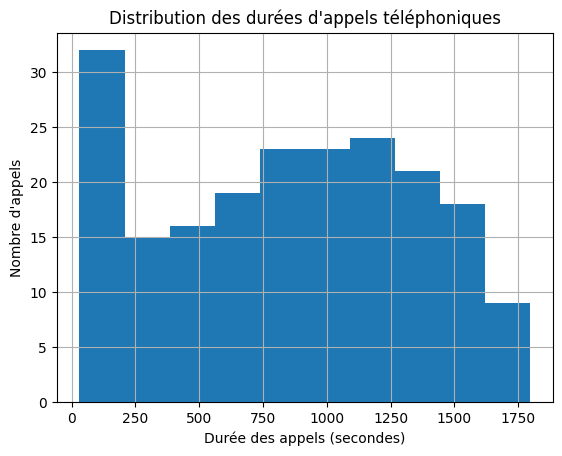

In [ ]:
# 
cdr_df['duration_sec'].hist() # .hist() affiche un histogramme de la colonne 'duration_sec' pour visualiser la distribution des durées d'appels.

plt.xlabel("Durée des appels (secondes)") # Titre de l’axe X
plt.ylabel("Nombre d'appels") # Titre de l’axe Y
plt.title("Distribution des durées d'appels téléphoniques") # Titre du graphique
plt.show() # Affiche le graphique avec les titres

### Étape 6 : Vérification de l’anonymisation des données

Dans cette étape, on vérifie que les identifiants des appelants (`caller_id`) sont bien anonymisés :  
- On affiche quelques valeurs pour s’assurer qu’il ne s’agit pas de vrais numéros de téléphone, mais de chaînes de caractères hashées.
- On vérifie la longueur et le format des identifiants.


In [10]:
# Afficher les 5 premiers caller_id pour vérifier l'anonymisation
print(cdr_df['caller_id'].head()) # .head() Affiche les 5 premiers identifiants anonymisés

# Vérifier la longueur des identifiants (doit être 64 caractères pour SHA-256)
print("Longueur d'un caller_id :", len(cdr_df['caller_id'][0])) # .len() Affiche la longueur du premier identifiant

0    b2b79fe6a94f1d82fa5972eaa6647146fd97d3cec89b53...
1    9a414725d4d31b8e443e0f5f4ea3d9eb1c74f6291422f8...
2    aab3e738cb3d19170392f1516db9aae2398b40af97a0f9...
3    34f186ba3c2f4059776724f32f746e17a124f51cbba67f...
4    ea24093ef6253cec250cd830d4a8ae0692f362c539bf23...
Name: caller_id, dtype: object
Longueur d'un caller_id : 64


### Conclusion

Ce notebook a permis d’explorer les données synthétiques téléphonie :
- Chargement et aperçu des données
- Calcul de statistiques descriptives
- Visualisation de la distribution des durées d’appels
- Vérification de l’anonymisation des identifiants

Ces analyses montrent que les données sont structurées et anonymisées correctement.  
La prochaine étape pourrait être l’analyse des dialogues ou l’application de modèles d’IA pour extraire des insights ou automatiser des tâches.